<a href="https://colab.research.google.com/github/thpossidente/COGS-298-Project/blob/master/COGS298_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output



Using TensorFlow backend.


Load the Data that will be used to train the network.

Start with "GameDataTom" and "2017Wins."

In [20]:
from google.colab import files
uploaded = files.upload()

Saving 2017Wins.csv to 2017Wins (1).csv
Saving GameDataTom.csv to GameDataTom (2).csv


The code below just allows us see what files were uploaded.

In [21]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

User uploaded file "2017Wins.csv" with length 8191 bytes
User uploaded file "GameDataTom.csv" with length 383610 bytes


Reading the training files and formatting appropriately.

In [0]:
import pandas as pd
import io
#teamdata = pd.read_csv(io.StringIO(uploaded['2017SeasonStats.csv'].decode('utf-8')), header = 0)
teamdata = pd.read_csv(io.StringIO(uploaded['GameDataTom.csv'].decode('utf-8')), header = 0)
wins = pd.read_csv(io.StringIO(uploaded['2017Wins.csv'].decode('utf-8')), header = 0)
teamdata = teamdata.drop(teamdata.columns[0], axis=1)
wins = wins.drop(wins.columns[0], axis=1)

wins = wins.values
teamdata = teamdata.values


Upload "2017OctoberDecStatsTestTom" and "2017WinsOctoberDecTest"

In [39]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Reading the test files and format appropriately.

In [0]:
teamdatatest = pd.read_csv(io.StringIO(uploaded['2017OctoberDecStatsTestTom.csv'].decode('utf-8')), header = 0)
winstest = pd.read_csv(io.StringIO(uploaded['2017WinsOctoberDecTest.csv'].decode('utf-8')), header = 0)
teamdatatest = teamdatatest.drop(teamdatatest.columns[0], axis=1)
winstest = winstest.drop(winstest.columns[0], axis=1)

winstest = winstest.values
teamdatatest = teamdatatest.values

Reshaping the training data so that it is in 3 dimensions.

In [0]:
# Dimensions: (row, column, 3ds) 
teamdata = teamdata.reshape(987,36,1)
wins = wins.reshape(987,1)
#teamdata[0]

In [0]:
#wins


array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

Reshape the test data

In [0]:
teamdatatest.shape
winstest.shape
teamdatatest = teamdatatest.reshape(488,36,1)
winstest = winstest.reshape(488,1)

#teamdatatest[0]
#winstest

Beginning of Model

In [0]:
model = Sequential()

In [0]:
model.add(Flatten(input_shape=(36,1)))
model.add(Dense(units=72, activation='relu', name='Hidden1', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(units=80, activation='relu', name='Hidden1.2', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))


In [0]:
model.add(Dense(units= 154, activation='relu', name="Hidden2", kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(units = 52, activation='relu', name='Hidden2.2', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))

In [28]:
model.add(Dense(units=1, activation='sigmoid', name="Output"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 36)                0         
_________________________________________________________________
Hidden1 (Dense)              (None, 72)                2664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 72)                0         
_________________________________________________________________
Hidden1.2 (Dense)            (None, 80)                5840      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
Hidden2 (Dense)              (None, 154)               12474     
_________________________________________________________________
dropout_3 (Dropout)          (None, 154)               0         
__________

In [0]:
rmsprop = keras.optimizers.RMSprop(lr=0.0003, rho=0.9, epsilon=None, decay=0.0)
model.compile(optimizer= 'Adam',
             loss= 'binary_crossentropy',
             metrics= ['accuracy'])

Run the model with the training data and se how it performs on the training data and test data.

In [30]:
#history = model.fit(teamdata, wins, epochs=50, batch_size=50)
history = model.fit(teamdata, wins, validation_data=(teamdatatest, winstest), epochs=250, batch_size=20)

Train on 987 samples, validate on 488 samples
Epoch 1/250
987/987 [==============================] - 0s 443us/step - loss: 1.6573 - acc: 0.5441 - val_loss: 0.6904 - val_acc: 0.5451
Epoch 2/250
987/987 [==============================] - 0s 152us/step - loss: 0.8048 - acc: 0.5147 - val_loss: 0.6841 - val_acc: 0.5758
Epoch 3/250
987/987 [==============================] - 0s 135us/step - loss: 0.7202 - acc: 0.5481 - val_loss: 0.6821 - val_acc: 0.5738
Epoch 4/250
987/987 [==============================] - 0s 138us/step - loss: 0.6987 - acc: 0.5532 - val_loss: 0.6857 - val_acc: 0.5717
Epoch 5/250
987/987 [==============================] - 0s 139us/step - loss: 0.6955 - acc: 0.5745 - val_loss: 0.6803 - val_acc: 0.5738
Epoch 6/250
987/987 [==============================] - 0s 147us/step - loss: 0.6966 - acc: 0.5522 - val_loss: 0.6828 - val_acc: 0.5738
Epoch 7/250
987/987 [==============================] - 0s 145us/step - loss: 0.6880 - acc: 0.5684 - val_loss: 0.6843 - val_acc: 0.5738
Epoch 8/2

987/987 [==============================] - 0s 150us/step - loss: 0.6824 - acc: 0.5805 - val_loss: 0.6813 - val_acc: 0.5738
Epoch 20/250
987/987 [==============================] - 0s 149us/step - loss: 0.6849 - acc: 0.5755 - val_loss: 0.6808 - val_acc: 0.5738
Epoch 21/250
987/987 [==============================] - 0s 147us/step - loss: 0.6789 - acc: 0.5765 - val_loss: 0.6782 - val_acc: 0.5738
Epoch 22/250
987/987 [==============================] - 0s 148us/step - loss: 0.6760 - acc: 0.5775 - val_loss: 0.6772 - val_acc: 0.5738
Epoch 23/250
987/987 [==============================] - 0s 167us/step - loss: 0.6812 - acc: 0.5805 - val_loss: 0.6821 - val_acc: 0.5738
Epoch 24/250
987/987 [==============================] - 0s 158us/step - loss: 0.6797 - acc: 0.5856 - val_loss: 0.6814 - val_acc: 0.5738
Epoch 25/250
987/987 [==============================] - 0s 148us/step - loss: 0.6776 - acc: 0.5805 - val_loss: 0.6763 - val_acc: 0.5738
Epoch 26/250
987/987 [==============================] - 0s 14

Epoch 37/250
987/987 [==============================] - 0s 147us/step - loss: 0.6757 - acc: 0.5785 - val_loss: 0.6791 - val_acc: 0.5738
Epoch 38/250
987/987 [==============================] - 0s 155us/step - loss: 0.6760 - acc: 0.5805 - val_loss: 0.6771 - val_acc: 0.5738
Epoch 39/250
987/987 [==============================] - 0s 168us/step - loss: 0.6733 - acc: 0.5805 - val_loss: 0.6724 - val_acc: 0.5738
Epoch 40/250
987/987 [==============================] - 0s 148us/step - loss: 0.6758 - acc: 0.5805 - val_loss: 0.6751 - val_acc: 0.5738
Epoch 41/250
987/987 [==============================] - 0s 152us/step - loss: 0.6743 - acc: 0.5775 - val_loss: 0.6742 - val_acc: 0.5738
Epoch 42/250
987/987 [==============================] - 0s 148us/step - loss: 0.6720 - acc: 0.5836 - val_loss: 0.6723 - val_acc: 0.5738
Epoch 43/250
987/987 [==============================] - 0s 146us/step - loss: 0.6758 - acc: 0.5805 - val_loss: 0.6823 - val_acc: 0.5738
Epoch 44/250
987/987 [==========================

Epoch 55/250
987/987 [==============================] - 0s 155us/step - loss: 0.6743 - acc: 0.5795 - val_loss: 0.6729 - val_acc: 0.5943
Epoch 56/250
987/987 [==============================] - 0s 154us/step - loss: 0.6723 - acc: 0.5805 - val_loss: 0.6688 - val_acc: 0.5840
Epoch 57/250
987/987 [==============================] - 0s 148us/step - loss: 0.6657 - acc: 0.6039 - val_loss: 0.6688 - val_acc: 0.5943
Epoch 58/250
987/987 [==============================] - 0s 167us/step - loss: 0.6735 - acc: 0.5968 - val_loss: 0.6661 - val_acc: 0.6127
Epoch 59/250
987/987 [==============================] - 0s 152us/step - loss: 0.6733 - acc: 0.5968 - val_loss: 0.6811 - val_acc: 0.5697
Epoch 60/250
987/987 [==============================] - 0s 147us/step - loss: 0.6715 - acc: 0.5795 - val_loss: 0.6674 - val_acc: 0.5779
Epoch 61/250
987/987 [==============================] - 0s 160us/step - loss: 0.6705 - acc: 0.5836 - val_loss: 0.6678 - val_acc: 0.5963
Epoch 62/250
987/987 [==========================

987/987 [==============================] - 0s 152us/step - loss: 0.6702 - acc: 0.5876 - val_loss: 0.6731 - val_acc: 0.5738
Epoch 74/250
987/987 [==============================] - 0s 149us/step - loss: 0.6706 - acc: 0.5887 - val_loss: 0.6674 - val_acc: 0.5697
Epoch 75/250
987/987 [==============================] - 0s 151us/step - loss: 0.6691 - acc: 0.5978 - val_loss: 0.6646 - val_acc: 0.6066
Epoch 76/250
987/987 [==============================] - 0s 165us/step - loss: 0.6690 - acc: 0.5968 - val_loss: 0.6673 - val_acc: 0.5717
Epoch 77/250
987/987 [==============================] - 0s 148us/step - loss: 0.6578 - acc: 0.5897 - val_loss: 0.6642 - val_acc: 0.6066
Epoch 78/250
987/987 [==============================] - 0s 162us/step - loss: 0.6703 - acc: 0.5887 - val_loss: 0.6661 - val_acc: 0.5881
Epoch 79/250
987/987 [==============================] - 0s 156us/step - loss: 0.6696 - acc: 0.5876 - val_loss: 0.6679 - val_acc: 0.5840
Epoch 80/250
987/987 [==============================] - 0s 15

987/987 [==============================] - 0s 162us/step - loss: 0.6651 - acc: 0.6039 - val_loss: 0.6611 - val_acc: 0.6086
Epoch 91/250
987/987 [==============================] - 0s 156us/step - loss: 0.6689 - acc: 0.6028 - val_loss: 0.6689 - val_acc: 0.6066
Epoch 92/250
987/987 [==============================] - 0s 151us/step - loss: 0.6685 - acc: 0.6130 - val_loss: 0.6669 - val_acc: 0.5902
Epoch 93/250
987/987 [==============================] - 0s 150us/step - loss: 0.6574 - acc: 0.6018 - val_loss: 0.6602 - val_acc: 0.5779
Epoch 94/250
987/987 [==============================] - 0s 153us/step - loss: 0.6644 - acc: 0.6069 - val_loss: 0.6662 - val_acc: 0.5799
Epoch 95/250
987/987 [==============================] - 0s 154us/step - loss: 0.6653 - acc: 0.6018 - val_loss: 0.6652 - val_acc: 0.6107
Epoch 96/250
987/987 [==============================] - 0s 151us/step - loss: 0.6657 - acc: 0.6008 - val_loss: 0.6664 - val_acc: 0.5984
Epoch 97/250
987/987 [==============================] - 0s 17

987/987 [==============================] - 0s 156us/step - loss: 0.6637 - acc: 0.6069 - val_loss: 0.6617 - val_acc: 0.5984
Epoch 108/250
987/987 [==============================] - 0s 152us/step - loss: 0.6524 - acc: 0.6180 - val_loss: 0.6591 - val_acc: 0.6127
Epoch 109/250
987/987 [==============================] - 0s 159us/step - loss: 0.6603 - acc: 0.6120 - val_loss: 0.6644 - val_acc: 0.6127
Epoch 110/250
987/987 [==============================] - 0s 154us/step - loss: 0.6674 - acc: 0.6069 - val_loss: 0.6588 - val_acc: 0.5922
Epoch 111/250
987/987 [==============================] - 0s 153us/step - loss: 0.6651 - acc: 0.6049 - val_loss: 0.6625 - val_acc: 0.6250
Epoch 112/250
987/987 [==============================] - 0s 158us/step - loss: 0.6667 - acc: 0.6028 - val_loss: 0.6660 - val_acc: 0.6066
Epoch 113/250
987/987 [==============================] - 0s 157us/step - loss: 0.6649 - acc: 0.6140 - val_loss: 0.6655 - val_acc: 0.6086
Epoch 114/250
987/987 [==============================] 

987/987 [==============================] - 0s 155us/step - loss: 0.6648 - acc: 0.6190 - val_loss: 0.6682 - val_acc: 0.5943
Epoch 126/250
987/987 [==============================] - 0s 151us/step - loss: 0.6612 - acc: 0.6190 - val_loss: 0.6588 - val_acc: 0.6230
Epoch 127/250
987/987 [==============================] - 0s 153us/step - loss: 0.6591 - acc: 0.6079 - val_loss: 0.6583 - val_acc: 0.6148
Epoch 128/250
987/987 [==============================] - 0s 157us/step - loss: 0.6618 - acc: 0.6069 - val_loss: 0.6584 - val_acc: 0.6189
Epoch 129/250
987/987 [==============================] - 0s 154us/step - loss: 0.6587 - acc: 0.5947 - val_loss: 0.6643 - val_acc: 0.5820
Epoch 130/250
987/987 [==============================] - 0s 155us/step - loss: 0.6586 - acc: 0.6201 - val_loss: 0.6588 - val_acc: 0.6025
Epoch 131/250
987/987 [==============================] - 0s 152us/step - loss: 0.6588 - acc: 0.6099 - val_loss: 0.6630 - val_acc: 0.5963
Epoch 132/250
987/987 [==============================] 

987/987 [==============================] - 0s 158us/step - loss: 0.6561 - acc: 0.6039 - val_loss: 0.6613 - val_acc: 0.6148
Epoch 144/250
987/987 [==============================] - 0s 155us/step - loss: 0.6608 - acc: 0.6028 - val_loss: 0.6643 - val_acc: 0.5902
Epoch 145/250
987/987 [==============================] - 0s 156us/step - loss: 0.6543 - acc: 0.6180 - val_loss: 0.6596 - val_acc: 0.6148
Epoch 146/250
987/987 [==============================] - 0s 152us/step - loss: 0.6659 - acc: 0.5927 - val_loss: 0.6646 - val_acc: 0.6107
Epoch 147/250
987/987 [==============================] - 0s 153us/step - loss: 0.6551 - acc: 0.6109 - val_loss: 0.6614 - val_acc: 0.6025
Epoch 148/250
987/987 [==============================] - 0s 151us/step - loss: 0.6560 - acc: 0.6150 - val_loss: 0.6637 - val_acc: 0.6127
Epoch 149/250
987/987 [==============================] - 0s 149us/step - loss: 0.6573 - acc: 0.6079 - val_loss: 0.6657 - val_acc: 0.6066
Epoch 150/250
987/987 [==============================] 

987/987 [==============================] - 0s 152us/step - loss: 0.6527 - acc: 0.6089 - val_loss: 0.6599 - val_acc: 0.6066
Epoch 162/250
987/987 [==============================] - 0s 157us/step - loss: 0.6555 - acc: 0.6028 - val_loss: 0.6712 - val_acc: 0.6086
Epoch 163/250
987/987 [==============================] - 0s 146us/step - loss: 0.6618 - acc: 0.6069 - val_loss: 0.6654 - val_acc: 0.6107
Epoch 164/250
987/987 [==============================] - 0s 158us/step - loss: 0.6552 - acc: 0.6221 - val_loss: 0.6622 - val_acc: 0.6066
Epoch 165/250
987/987 [==============================] - 0s 155us/step - loss: 0.6447 - acc: 0.6261 - val_loss: 0.6714 - val_acc: 0.6086
Epoch 166/250
987/987 [==============================] - 0s 159us/step - loss: 0.6560 - acc: 0.5968 - val_loss: 0.6712 - val_acc: 0.6107
Epoch 167/250
987/987 [==============================] - 0s 156us/step - loss: 0.6543 - acc: 0.6160 - val_loss: 0.6722 - val_acc: 0.6107
Epoch 168/250
987/987 [==============================] 

Epoch 179/250
987/987 [==============================] - 0s 152us/step - loss: 0.6589 - acc: 0.6049 - val_loss: 0.6663 - val_acc: 0.5984
Epoch 180/250
987/987 [==============================] - 0s 155us/step - loss: 0.6538 - acc: 0.6079 - val_loss: 0.6713 - val_acc: 0.6127
Epoch 181/250
987/987 [==============================] - 0s 154us/step - loss: 0.6597 - acc: 0.6241 - val_loss: 0.6698 - val_acc: 0.5861
Epoch 182/250
987/987 [==============================] - 0s 156us/step - loss: 0.6584 - acc: 0.6049 - val_loss: 0.6723 - val_acc: 0.6045
Epoch 183/250
987/987 [==============================] - 0s 150us/step - loss: 0.6607 - acc: 0.6069 - val_loss: 0.6813 - val_acc: 0.6045
Epoch 184/250
987/987 [==============================] - 0s 153us/step - loss: 0.6552 - acc: 0.6130 - val_loss: 0.6581 - val_acc: 0.6148
Epoch 185/250
987/987 [==============================] - 0s 156us/step - loss: 0.6595 - acc: 0.6049 - val_loss: 0.6606 - val_acc: 0.6107
Epoch 186/250
987/987 [==================

Epoch 197/250
987/987 [==============================] - 0s 151us/step - loss: 0.6655 - acc: 0.5968 - val_loss: 0.6812 - val_acc: 0.6086
Epoch 198/250
987/987 [==============================] - 0s 146us/step - loss: 0.6525 - acc: 0.6201 - val_loss: 0.6724 - val_acc: 0.6045
Epoch 199/250
987/987 [==============================] - 0s 161us/step - loss: 0.6588 - acc: 0.6221 - val_loss: 0.6747 - val_acc: 0.5861
Epoch 200/250
987/987 [==============================] - 0s 156us/step - loss: 0.6568 - acc: 0.6170 - val_loss: 0.6900 - val_acc: 0.6025
Epoch 201/250
987/987 [==============================] - 0s 160us/step - loss: 0.6628 - acc: 0.6079 - val_loss: 0.6651 - val_acc: 0.5943
Epoch 202/250
987/987 [==============================] - 0s 160us/step - loss: 0.6490 - acc: 0.6211 - val_loss: 0.6753 - val_acc: 0.6066
Epoch 203/250
987/987 [==============================] - 0s 153us/step - loss: 0.6528 - acc: 0.6008 - val_loss: 0.6653 - val_acc: 0.6025
Epoch 204/250
987/987 [==================

987/987 [==============================] - 0s 160us/step - loss: 0.6649 - acc: 0.6049 - val_loss: 0.6755 - val_acc: 0.5840
Epoch 216/250
987/987 [==============================] - 0s 155us/step - loss: 0.6556 - acc: 0.6160 - val_loss: 0.7114 - val_acc: 0.5881
Epoch 217/250
987/987 [==============================] - 0s 153us/step - loss: 0.6525 - acc: 0.6028 - val_loss: 0.6672 - val_acc: 0.6168
Epoch 218/250
987/987 [==============================] - 0s 153us/step - loss: 0.6611 - acc: 0.6049 - val_loss: 0.6858 - val_acc: 0.5984
Epoch 219/250
987/987 [==============================] - 0s 151us/step - loss: 0.6574 - acc: 0.6028 - val_loss: 0.6683 - val_acc: 0.6086
Epoch 220/250
987/987 [==============================] - 0s 158us/step - loss: 0.6549 - acc: 0.6059 - val_loss: 0.6786 - val_acc: 0.6148
Epoch 221/250
987/987 [==============================] - 0s 149us/step - loss: 0.6524 - acc: 0.6160 - val_loss: 0.6746 - val_acc: 0.6045
Epoch 222/250
987/987 [==============================] 

987/987 [==============================] - 0s 151us/step - loss: 0.6558 - acc: 0.6190 - val_loss: 0.6640 - val_acc: 0.5943
Epoch 233/250
987/987 [==============================] - 0s 156us/step - loss: 0.6501 - acc: 0.6211 - val_loss: 0.6591 - val_acc: 0.6066
Epoch 234/250
987/987 [==============================] - 0s 151us/step - loss: 0.6516 - acc: 0.6190 - val_loss: 0.6652 - val_acc: 0.6168
Epoch 235/250
987/987 [==============================] - 0s 159us/step - loss: 0.6603 - acc: 0.6109 - val_loss: 0.6695 - val_acc: 0.6148
Epoch 236/250
987/987 [==============================] - 0s 153us/step - loss: 0.6501 - acc: 0.6231 - val_loss: 0.6987 - val_acc: 0.5902
Epoch 237/250
987/987 [==============================] - 0s 147us/step - loss: 0.6621 - acc: 0.6231 - val_loss: 0.6713 - val_acc: 0.6107
Epoch 238/250
987/987 [==============================] - 0s 151us/step - loss: 0.6482 - acc: 0.6292 - val_loss: 0.6756 - val_acc: 0.6086
Epoch 239/250
987/987 [==============================] 

987/987 [==============================] - 0s 155us/step - loss: 0.6515 - acc: 0.6211 - val_loss: 0.6726 - val_acc: 0.6004


In [31]:
print(history.history.keys())  
plt.figure(1)  

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


Training Data Accuracy Graph

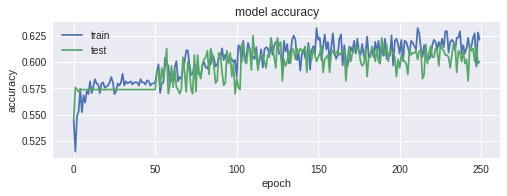

In [32]:

plt.subplot(211)  
plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left') 

Training Data Loss Graph

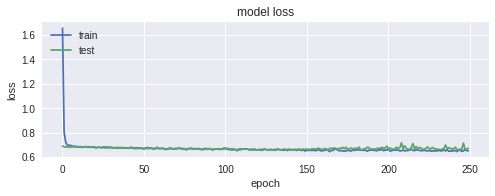

In [33]:
plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  

Upload Liberty League files: "LibertyLeagueStatsRebutta" and "LibertyLeagueWins"

In [34]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving LibertyLeagueStatsRebutta.csv to LibertyLeagueStatsRebutta.csv
Saving LibertyLeagueWins.csv to LibertyLeagueWins.csv
User uploaded file "LibertyLeagueStatsRebutta.csv" with length 2336 bytes
User uploaded file "LibertyLeagueWins.csv" with length 78 bytes


Format the liberty league data appropriately

In [35]:
libertyleaguestats = pd.read_csv(io.StringIO(uploaded['LibertyLeagueStatsRebutta.csv'].decode('utf-8')), header = 0)
libertyleagueswins = pd.read_csv(io.StringIO(uploaded['LibertyLeagueWins.csv'].decode('utf-8')), header = 0)

libertyleaguestats = libertyleaguestats.drop(libertyleaguestats.columns[0], axis=1)
libertyleagueswins = libertyleagueswins.drop(libertyleagueswins.columns[0], axis=1)

libertyleaguestats = libertyleaguestats.values
libertyleagueswins = libertyleagueswins.values

libertyleaguestats.shape

(7, 36)

Reshape the liberty league data

In [0]:
libertyleaguestats = libertyleaguestats.reshape(7,36,1)
libertyleagueswins = libertyleagueswins.reshape(7,1)

Predictions for liberty league games:

In [37]:
libleaguetests = model.predict_classes(libertyleaguestats)
libleaguetests

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

Actual results for these games:

In [38]:
libertyleagueswins


array([[1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])